Proyecto Grupal Nº2 - Grupo 3

Clasificación KNN y Nearest Centroid

In [1]:
#Importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
#Cargar dataset

df_principal = pd.read_csv("machine failure.csv")

df_principal.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [3]:
df_principal.shape

(10000, 14)

In [4]:
df_principal.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [5]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df_principal.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df_principal.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Partición de DF

EDA

In [8]:
# Columna "UDI"
df_principal["UDI"].describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: UDI, dtype: float64

In [9]:
# Número de elemento únicos igual al número de filas

df_principal["UDI"].unique().shape[0] == df_principal.shape[0]

# Podemos eliminar esta columna, lo haremos más adelante

True

In [10]:
# Columna "Product ID"
df_principal["Product ID"].describe()

count      10000
unique     10000
top       M14860
freq           1
Name: Product ID, dtype: object

In [11]:
# Número de elemento únicos igual al número de filas

df_principal["Product ID"].unique().shape[0] == df_principal.shape[0]

# Podemos eliminar esta columna, lo haremos más adelante

True

In [12]:
# Columna "Type"
df_principal["Type"].describe()

count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

In [13]:
df_principal["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

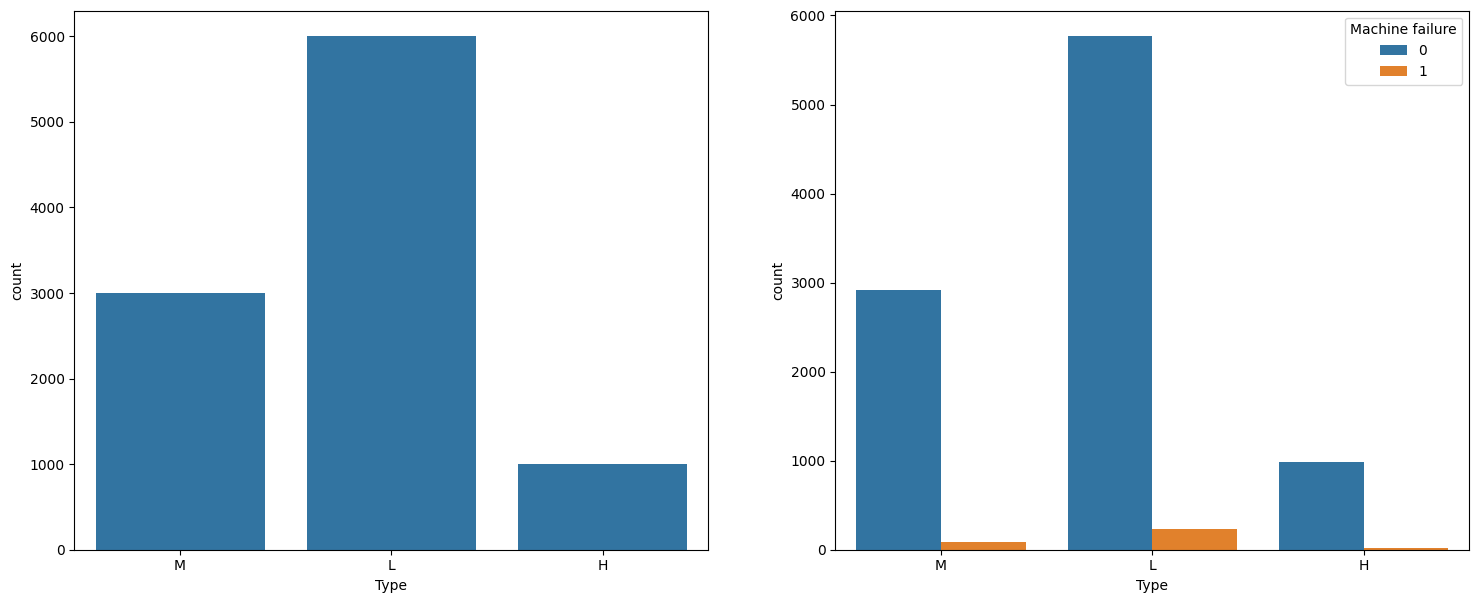

In [14]:
# Relación de la columna "Type" con la columna "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df_principal["Type"], ax = axes[0]);
sns.countplot(x = df_principal["Type"], hue = df_principal["Machine failure"],  ax = axes[1]);

plt.show()

In [15]:
# labelEncoder sobre la columna "Type" para transformarla a numerica

from sklearn.preprocessing import LabelEncoder

type_LabelEncoder = LabelEncoder()

type = type_LabelEncoder.fit_transform(df_principal["Type"]) 

df_principal["Type"] = type

df_principal

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     2                298.1                    308.6   
1         2     L47181     1                298.2                    308.7   
2         3     L47182     1                298.1                    308.5   
3         4     L47183     1                298.2                    308.6   
4         5     L47184     1                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     2                298.8                    308.4   
9996   9997     H39410     0                298.9                    308.4   
9997   9998     M24857     2                299.0                    308.6   
9998   9999     H39412     0                299.0                    308.7   
9999  10000     M24859     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [16]:
df_principal.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [17]:
#Column "Air temperature [k]"
df_principal["Air temperature [K]"].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

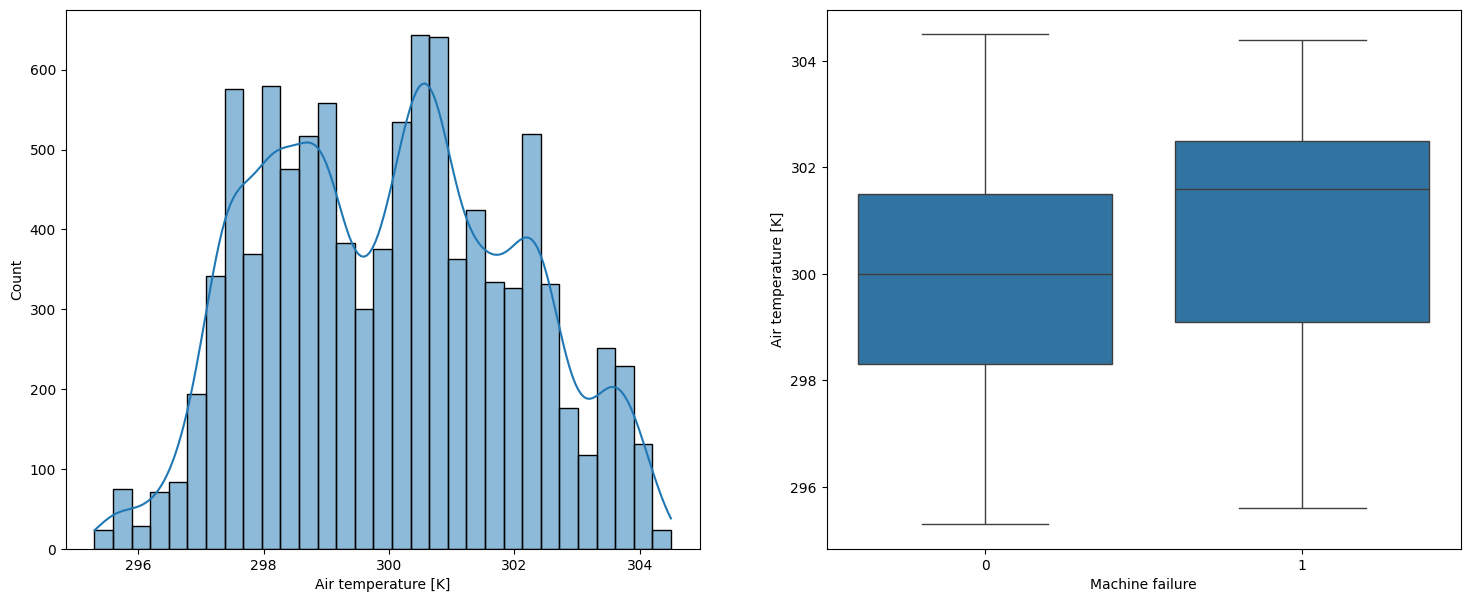

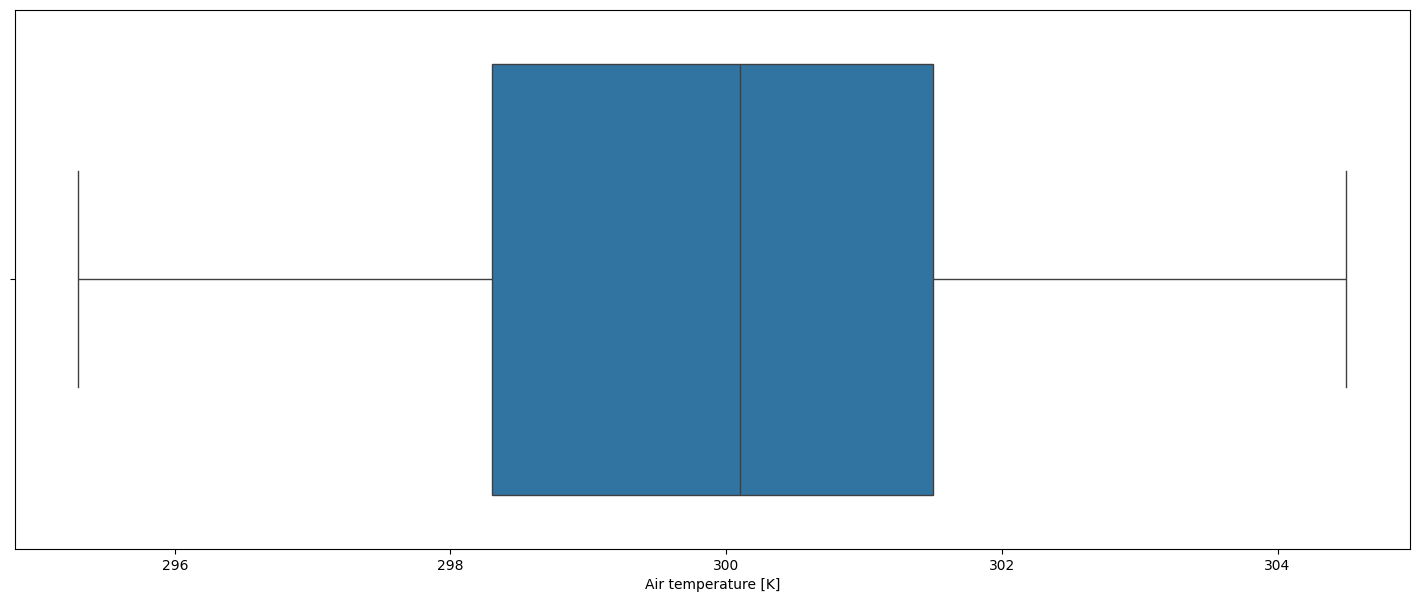

In [18]:
# Relación de la columna "Air temperature [K]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Air temperature [K]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Air temperature [K]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Air temperature [K]"]);
plt.show()

In [19]:
#Column "Process temperature [K]"
df_principal["Process temperature [K]"].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

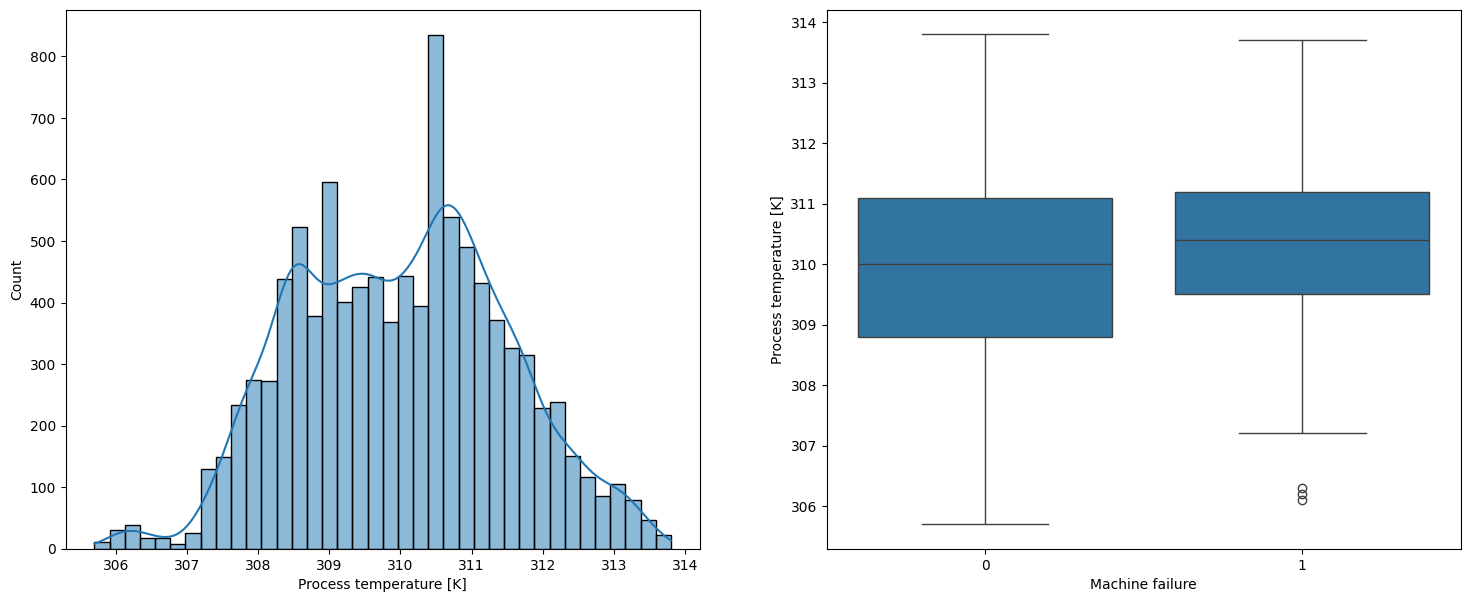

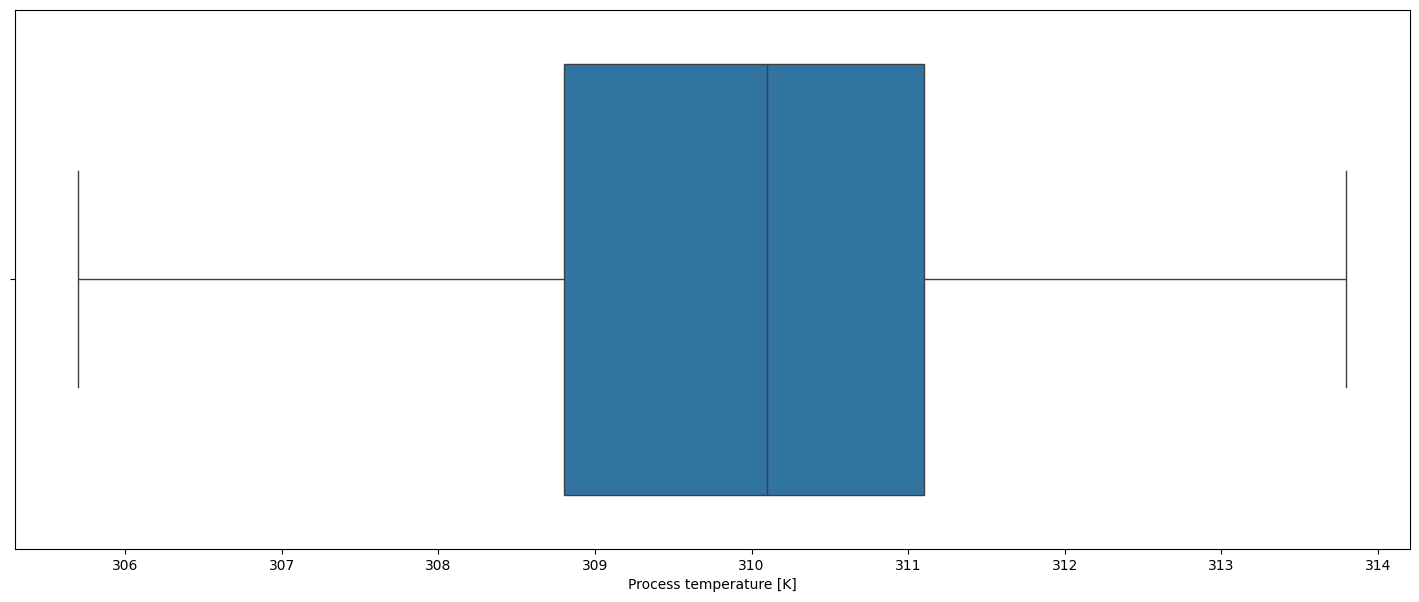

In [20]:
# Relación de la columna "Process temperature [K]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Process temperature [K]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Process temperature [K]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Process temperature [K]"]);
plt.show()

In [21]:
#Column "Rotational speed [rpm]"
df_principal["Rotational speed [rpm]"].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

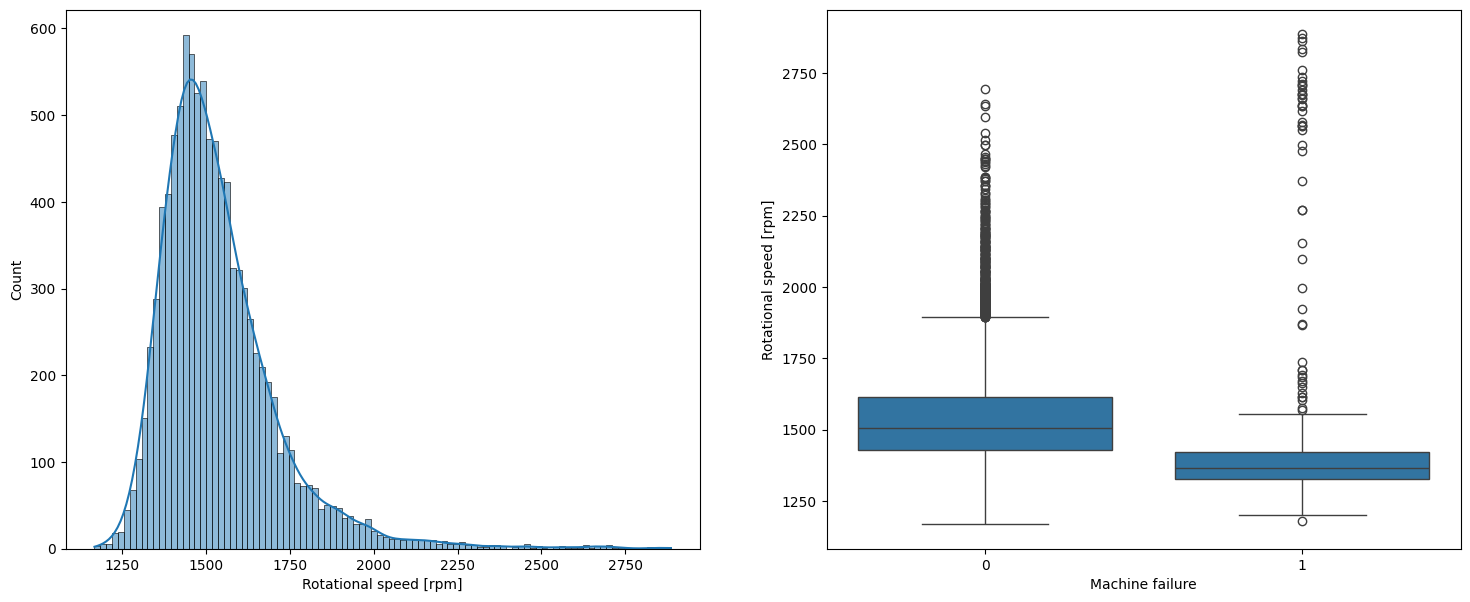

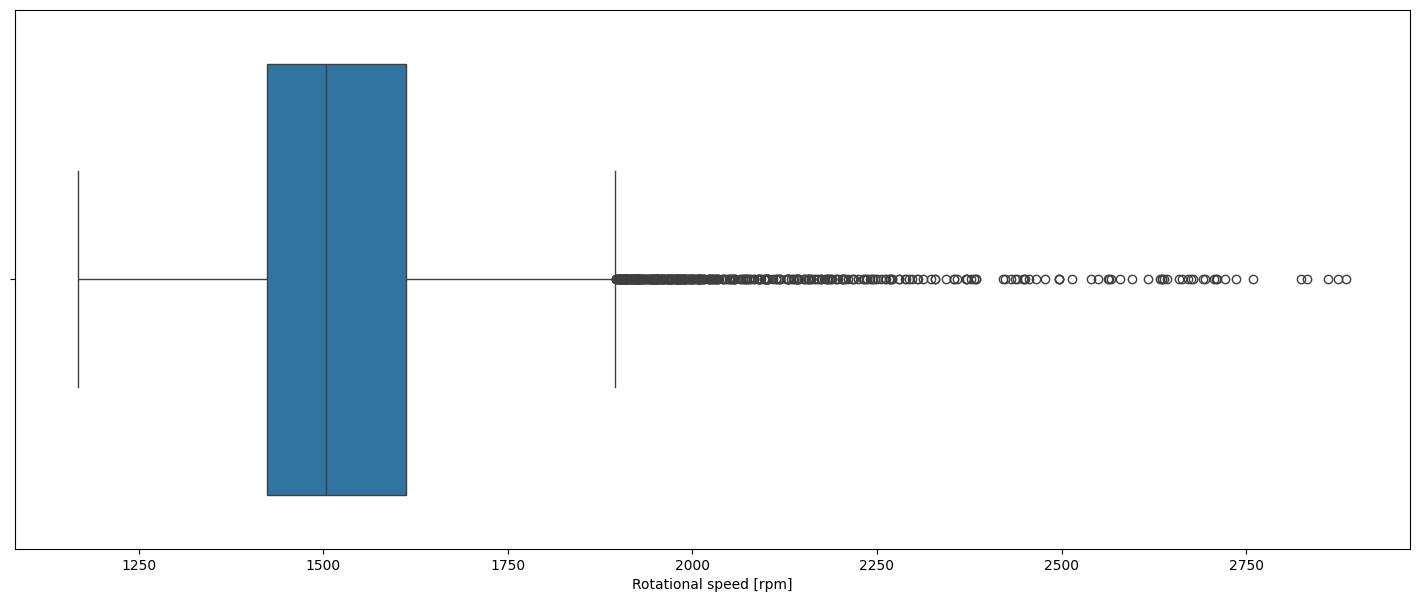

In [22]:
# Relación de la columna "Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Rotational speed [rpm]"]);
plt.show()

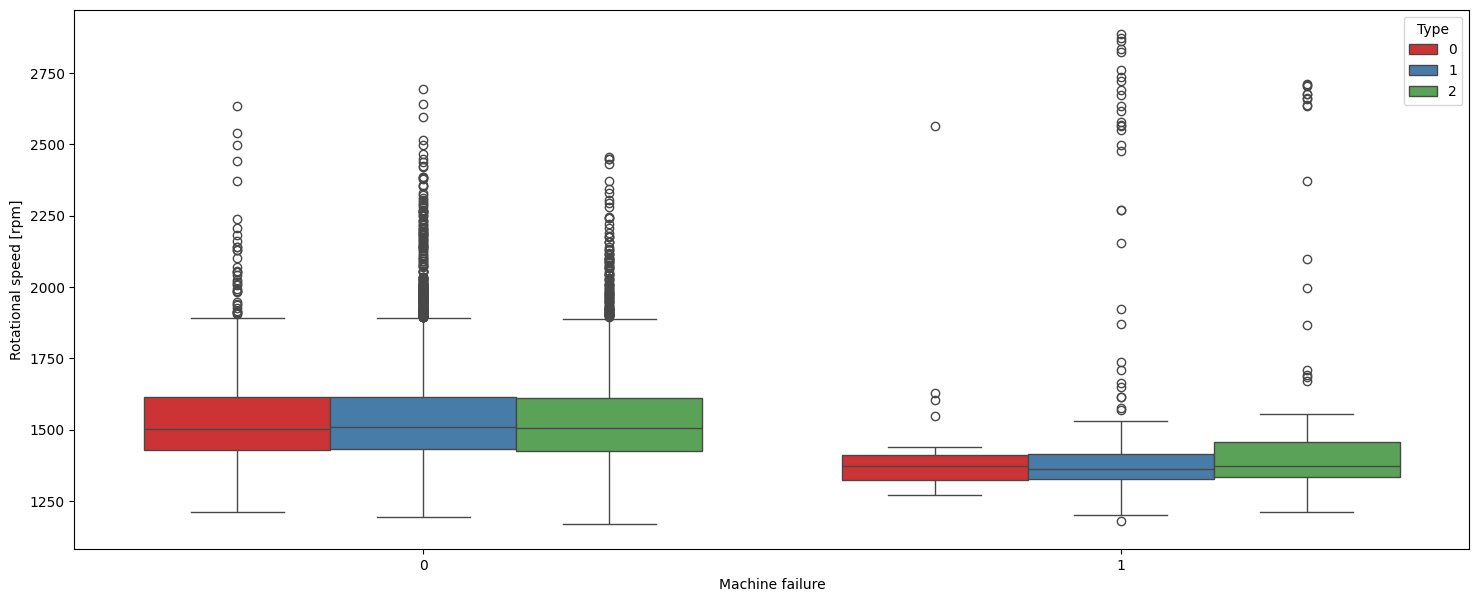

In [23]:
#Separando por "Type":

# Relación de la columna "Rotational speed [rpm]" con "Machine failure" para cada tipo de producto
plt.figure(figsize=(18, 7))
sns.boxplot(data=df_principal, x="Machine failure", y="Rotational speed [rpm]", hue="Type", palette='Set1')
plt.show()


In [24]:
#Como hay muchos outliers, probaremos hacer una transformación logarítmica

df_principal["Log_Rotational speed [rpm]"] = df_principal["Rotational speed [rpm]"].apply(lambda x : np.log(x + 1))

# Aplicamos np.log(x + 1) para evitar log(0)

df_principal["Log_Rotational speed [rpm]"]

0       7.347300
1       7.250636
2       7.312553
3       7.268223
4       7.250636
          ...   
9995    7.380879
9996    7.398174
9997    7.406103
9998    7.250636
9999    7.313887
Name: Log_Rotational speed [rpm], Length: 10000, dtype: float64

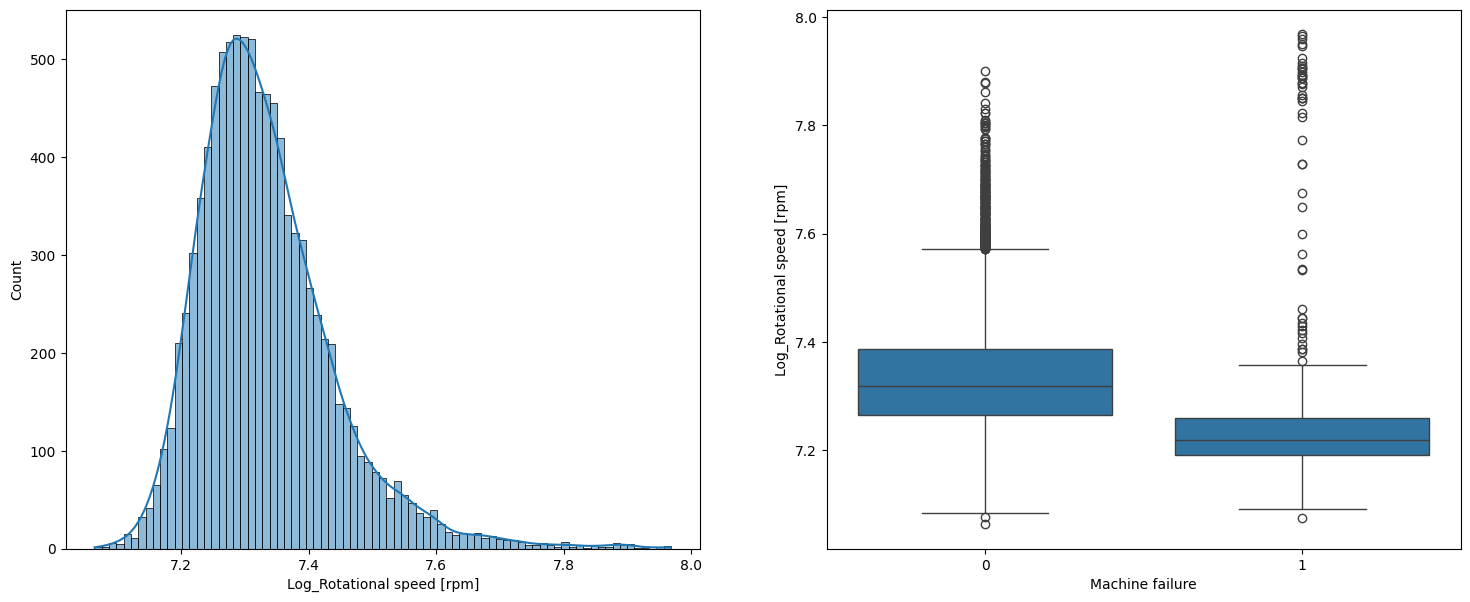

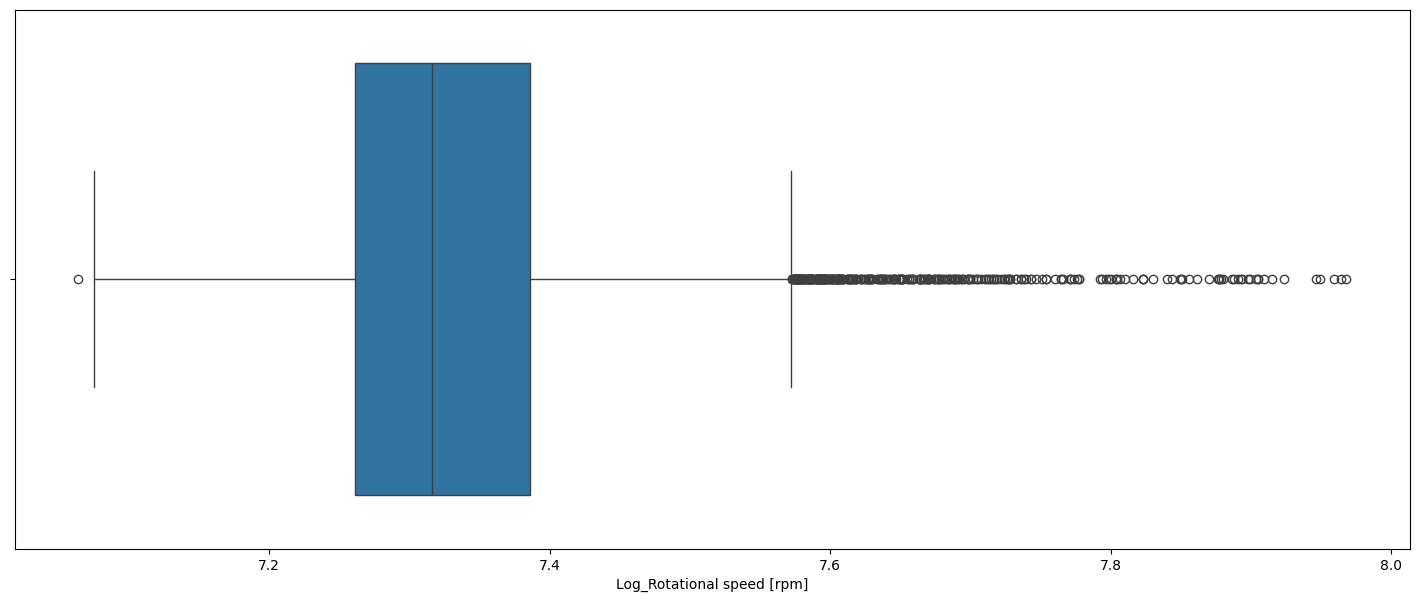

In [25]:
# Relación de la columna "Log_Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Log_Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Log_Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Log_Rotational speed [rpm]"]);
plt.show()

In [26]:
#No hay una mejora apreciable ... probaremos eliminando los outliers que quedan fuera del IQR
# # Manejo de outliers Columna "Rotational speed [rpm]"
# Calculo de cuartiles - "Rotational speed [rpm]"

q1 = df_principal["Rotational speed [rpm]"].quantile(q = 0.25)  # Q1
q3 = df_principal["Rotational speed [rpm]"].quantile(q = 0.75)  # Q3

# Rango intercuartil (IQR)
iqr = q3 - q1

# Calcular los limites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"IQR: [{limite_inferior}, {limite_superior}]")

df_principal = df_principal[df_principal["Rotational speed [rpm]"].between(limite_inferior, limite_superior)]

print(f"df: {df_principal.shape}")

IQR: [1139.5, 1895.5]
df: (9582, 15)


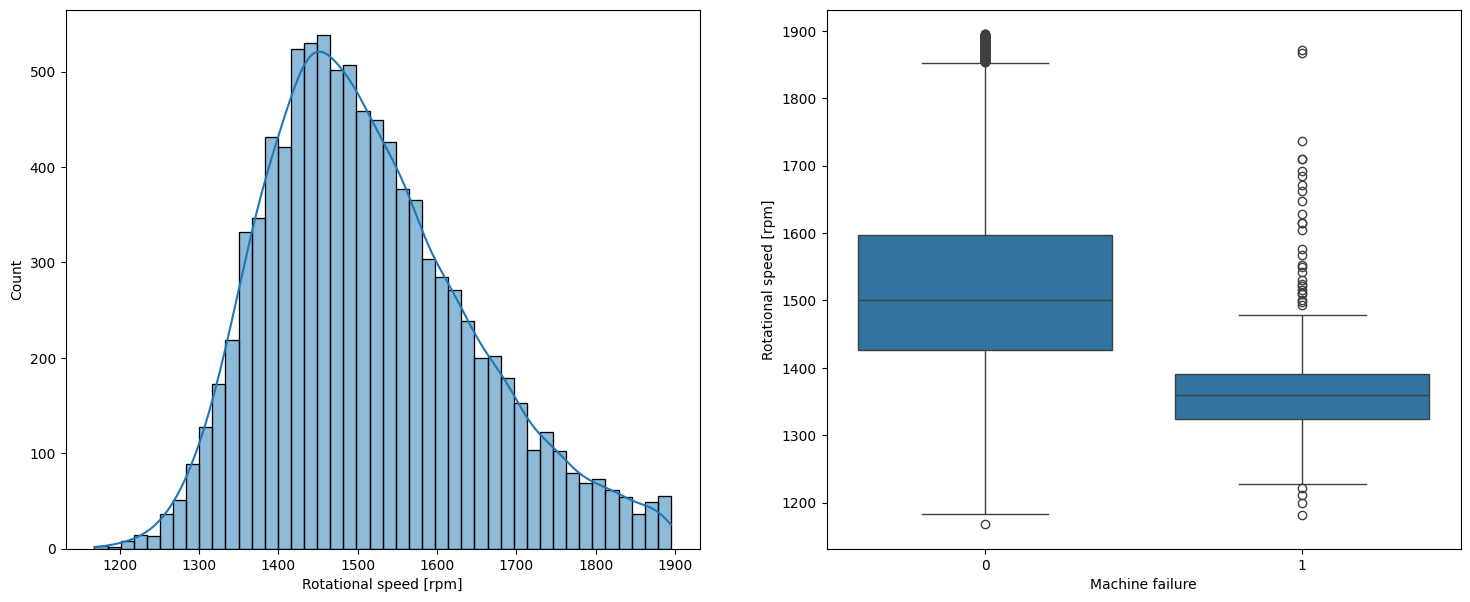

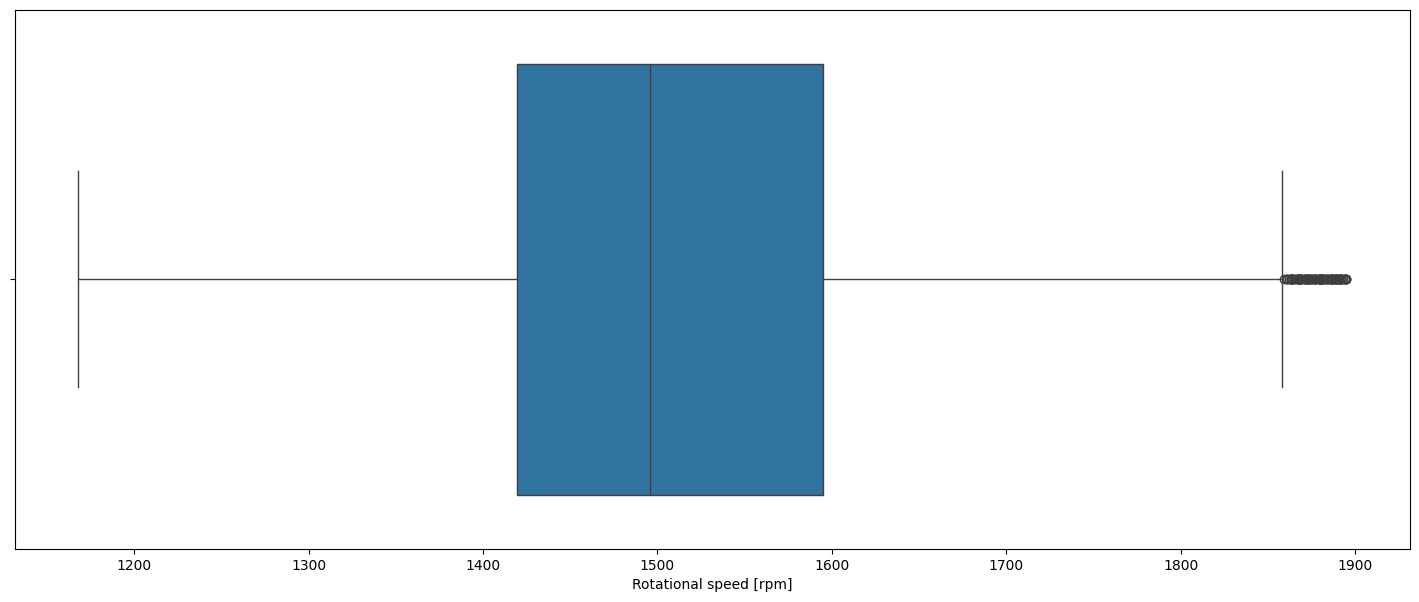

In [27]:
#Se han eliminado 418 filas, un 0,4% ... no parece ser relevante

# Relación de la columna "Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Rotational speed [rpm]"]);
plt.show()

In [28]:
#Column "Torque [Nm]"
df_principal["Torque [Nm]"].describe()

count    9582.000000
mean       40.907483
std         9.103176
min        20.100000
25%        34.200000
50%        40.600000
75%        47.100000
max        76.600000
Name: Torque [Nm], dtype: float64

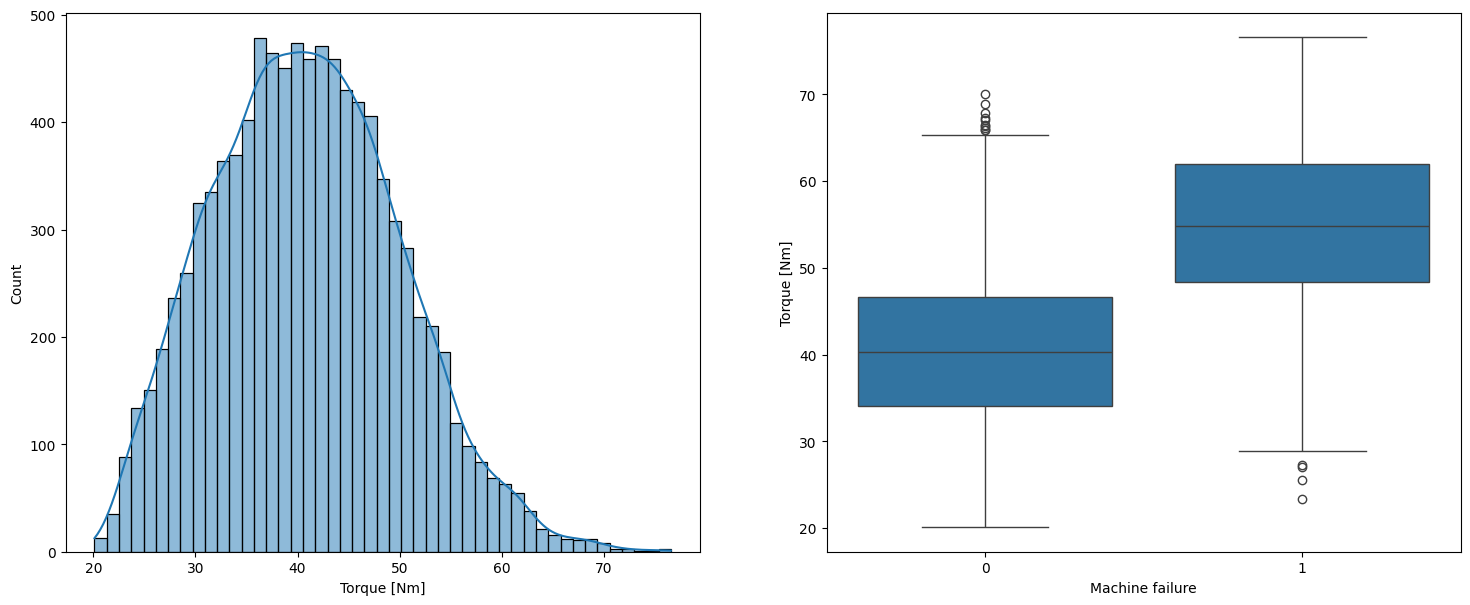

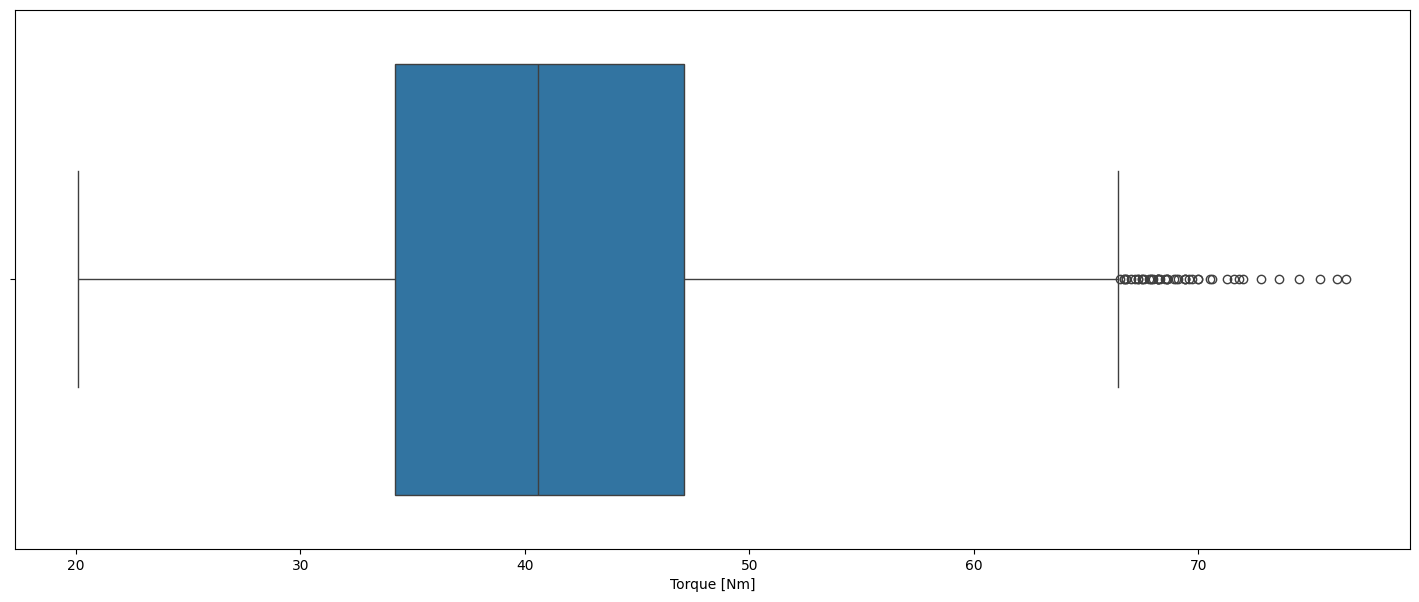

In [29]:
# Relación de la columna "Torque [Nm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Torque [Nm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Torque [Nm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Torque [Nm]"]);
plt.show()

In [30]:
#Tambien tiene outliers, pero se ve que no son tantos ni están tan lejos...
# lo dejaremos tal cual

In [31]:
#Column "Tool wear [min]"
df_principal["Tool wear [min]"].describe()

count    9582.000000
mean      108.022334
std        63.582966
min         0.000000
25%        53.000000
50%       108.000000
75%       162.000000
max       253.000000
Name: Tool wear [min], dtype: float64

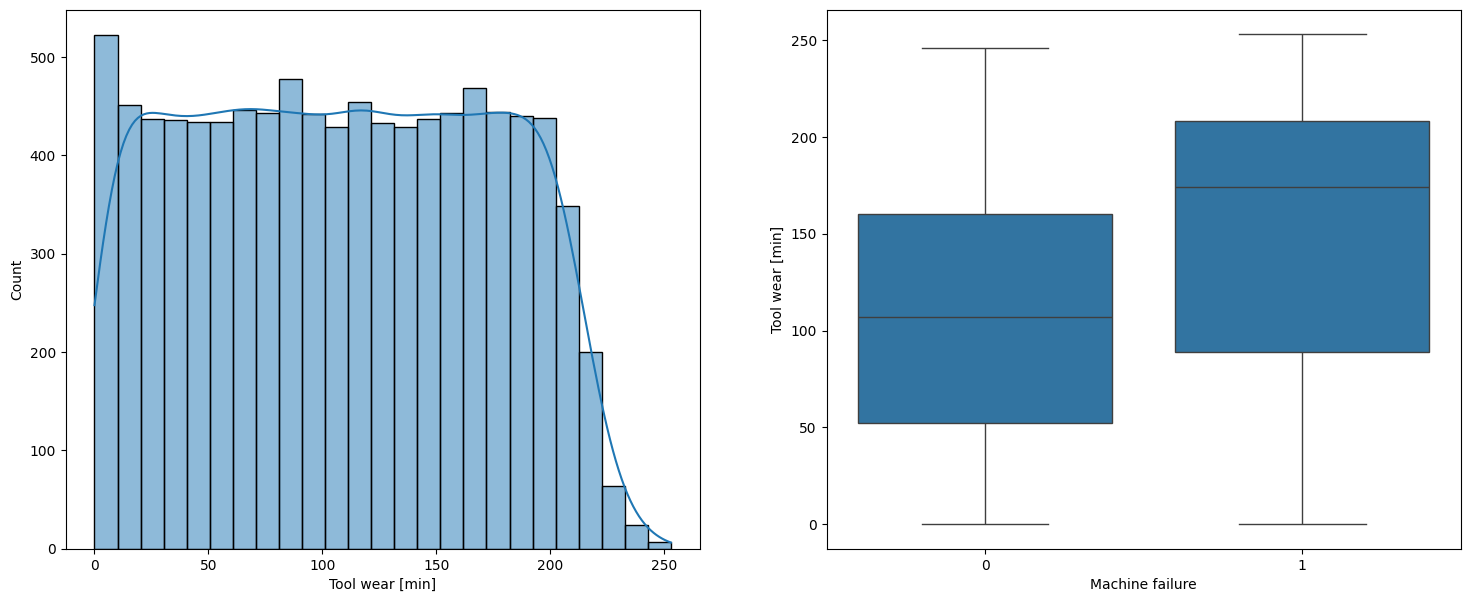

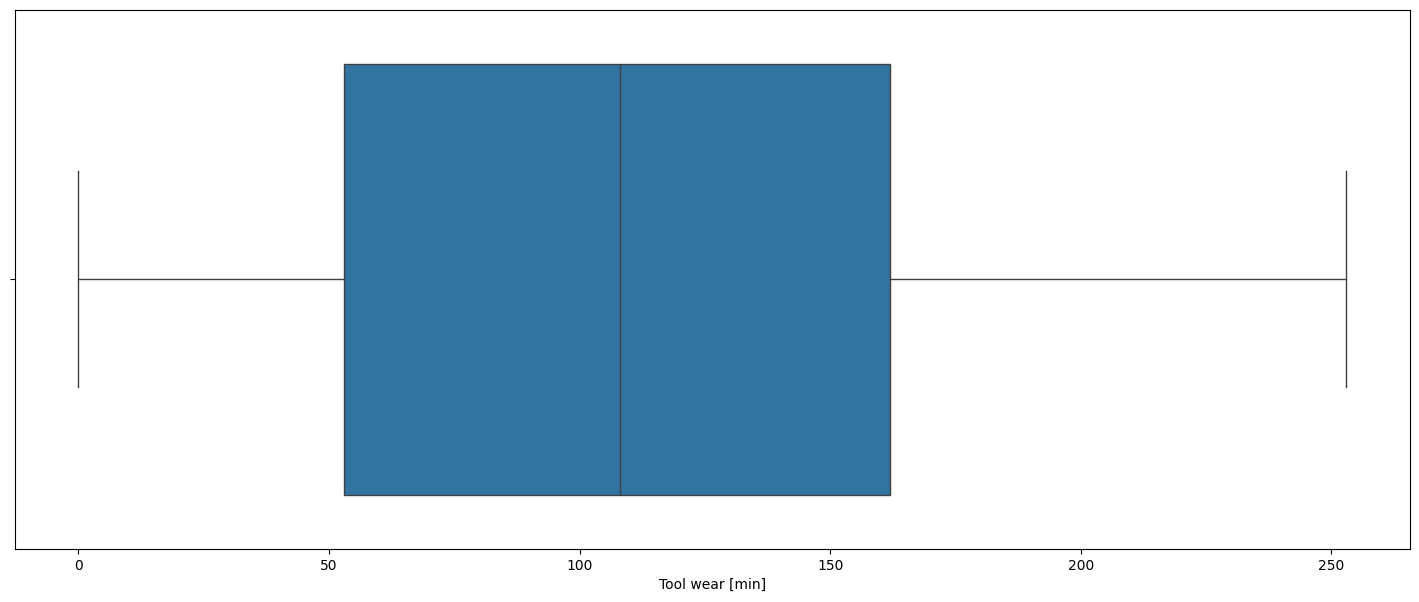

In [32]:
# Relación de la columna "Tool wear [min]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Tool wear [min]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Tool wear [min]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Tool wear [min]"]);
plt.show()

In [33]:
df_principal["TWF"].value_counts()

TWF
0    9540
1      42
Name: count, dtype: int64

In [34]:
df_principal["HDF"].value_counts()

HDF
0    9467
1     115
Name: count, dtype: int64

In [35]:
df_principal["PWF"].value_counts()

PWF
0    9518
1      64
Name: count, dtype: int64

In [36]:
df_principal["OSF"].value_counts()

OSF
0    9484
1      98
Name: count, dtype: int64

In [37]:
df_principal["RNF"].value_counts()

RNF
0    9563
1      19
Name: count, dtype: int64

En estas últimas 5 columnas hay mucho desbalanceo

In [38]:
# Columna "Machine failure"

# Esta es la columna que queremos predecir
# En este caso estamos haciendo una clasificación, por lo que esta columna debe tener valores enteros

df_principal["Machine failure"].value_counts()

Machine failure
0    9278
1     304
Name: count, dtype: int64

In [39]:
# Por último vamos a eliminar las columnas que no hagan falta

# Decidimos eliminar "UDI" y "Product ID"

df_principal_reducido = df_principal.copy()

df_principal_reducido.drop(["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF", "Log_Rotational speed [rpm]"], axis = 1, inplace = True)

df_principal_reducido

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                       1551         42.8                0                0  
1                       1408         46.3                3                0  
2                       1498         49.4                5                0  
3                       1433         39.5                7                0  
4                       1408         40.0                9                0  
...                      ...          ...              ...              ...  
9995                    1604         29.5               14                0  
9996                    1632         31.8               17                0  
9997                    1645         33.4               22                0  
9998                    1408         48.5               25                0  
9999                    1500         40.2               30                0  

[9582 rows x 7 columns]

Preparación de los datos: Filtrar el conjunto de datos por cada tipo de máquina y dividirlo en conjuntos de entrenamiento y prueba.

In [40]:
from sklearn.model_selection import train_test_split

# Lista para almacenar los conjuntos de datos divididos por tipo de máquina
datos_por_type_maquina = []

# Obtener los tipos únicos de máquina
type_maquina_unicos = df_principal_reducido["Type"].unique()

# Filtrar y dividir los datos por cada tipo de máquina
for type_maquina in type_maquina_unicos:
    # Filtrar el DataFrame por tipo de máquina
    datos_filtrados = df_principal_reducido[df_principal_reducido["Type"] == type_maquina].copy()
    
    # Dividir los datos en características (X) y variable objetivo (y)
    X = datos_filtrados.drop(columns=["Machine failure"])  
    y = datos_filtrados["Machine failure"]  
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Guardar los conjuntos de datos divididos en la lista
    datos_por_type_maquina.append((X_train, X_test, y_train, y_test))



Entrenamiento y evaluación del modelo para cada tipo de máquina: Para cada subconjunto de datos correspondiente a un tipo de máquina, aplicar el algoritmo KNeighborsClassifier, entrenar el modelo y evaluar su rendimiento. Al mismo tiempo se realiza el ajuste de los hiperparámetros: búsqueda de n_neighbors del modelo KNeighborsClassifier.

In [41]:
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista para almacenar los modelos entrenados
trained_models = []

# Inicializar una lista para almacenar la precisión del modelo para cada valor de k
list_accuracy = []

# Iterar sobre diferentes valores de k
for k in range(1, 60):
    # Inicializar una lista para almacenar los valores de precisión para cada tipo de máquina
    accuracy_por_type = []
    
   # Inicializar el modelo con el valor actual de k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Iterar sobre los conjuntos de datos por tipo de máquina
    for (X_train, X_test, y_train, y_test), type_maquina in zip(datos_por_type_maquina, type_maquina_unicos):
        # Aplicar SMOTE al conjunto de datos de entrenamiento solo si es necesario (si hay desequilibrio)
        if sum(y_train) < len(y_train):
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train
    
        # Entrenar el modelo con los datos equilibrados
        knn_classifier.fit(X_train_resampled, y_train_resampled)
    
        # Predecir en el conjunto de prueba
        yhat = knn_classifier.predict(X_test)
    
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, yhat)
        
        # Almacenar la precisión del modelo para este tipo de máquina
        accuracy_por_type.append(accuracy)
    
        # Guardar el modelo entrenado
        trained_models.append(knn_classifier)
        
    # Calcular el promedio de la precisión para este valor de k
    promedio_accuracy = sum(accuracy_por_type) / len(accuracy_por_type)
    
    # Imprimir el promedio de la precisión para este valor de k
    print(f"k: {k}, Precisión promedio del modelo para todos los tipos de máquina: {promedio_accuracy}")
    
    # Guardar la precisión promedio para este valor de k
    list_accuracy.append([k, promedio_accuracy])


k: 1, Precisión promedio del modelo para todos los tipos de máquina: 0.8857544110684468
k: 2, Precisión promedio del modelo para todos los tipos de máquina: 0.9097355237932881
k: 3, Precisión promedio del modelo para todos los tipos de máquina: 0.8681969900355736
k: 4, Precisión promedio del modelo para todos los tipos de máquina: 0.8915316042103664
k: 5, Precisión promedio del modelo para todos los tipos de máquina: 0.8604094583575036
k: 6, Precisión promedio del modelo para todos los tipos de máquina: 0.8805977537551736
k: 7, Precisión promedio del modelo para todos los tipos de máquina: 0.8554995600277078
k: 8, Precisión promedio del modelo para todos los tipos de máquina: 0.8719414136614679
k: 9, Precisión promedio del modelo para todos los tipos de máquina: 0.8508817871756431
k: 10, Precisión promedio del modelo para todos los tipos de máquina: 0.8604064311504804
k: 11, Precisión promedio del modelo para todos los tipos de máquina: 0.8465745345051537
k: 12, Precisión promedio del 

Análisis de resultados: Analiza las métricas de evaluación del modelo (por ejemplo, precisión) para cada tipo de máquina. Examina si el modelo funciona mejor para un tipo de máquina en particular o si hay algún patrón interesante en los resultados.

In [42]:
list_accuracy = np.array(list_accuracy)

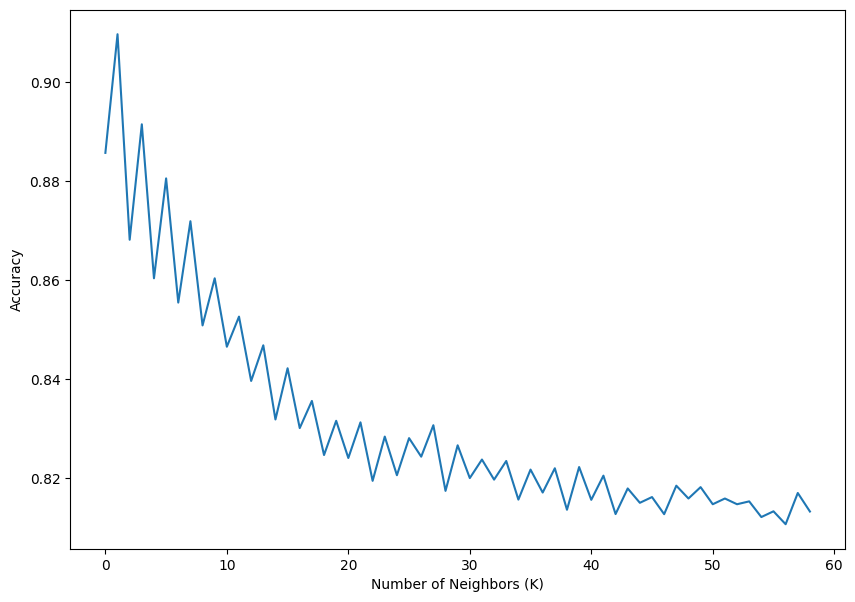

In [43]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [44]:
mejor_indice = np.argmax(list_accuracy[:, 1])
mejor_indice

1

In [45]:
list_accuracy[mejor_indice, :]

# (k, accuracy)

array([2.        , 0.90973552])

Métricas para el tipo de máquina M:
  Precisión (Accuracy): 0.88
  Precisión (Precision): 0.07246376811594203
  Recall: 0.5
  F1-Score: 0.12658227848101267
  Jaccard Score: 0.06756756756756757
  ROC AUC Score: 0.6933628318584071


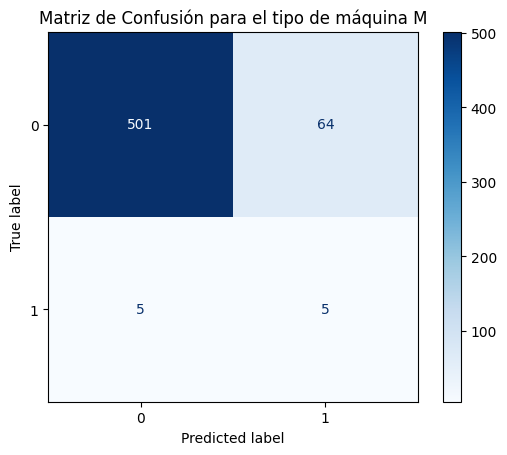



Métricas para el tipo de máquina L:
  Precisión (Accuracy): 0.8624891209747607
  Precisión (Precision): 0.14634146341463414
  Recall: 0.5714285714285714
  F1-Score: 0.23300970873786409
  Jaccard Score: 0.13186813186813187
  ROC AUC Score: 0.7224803200412957


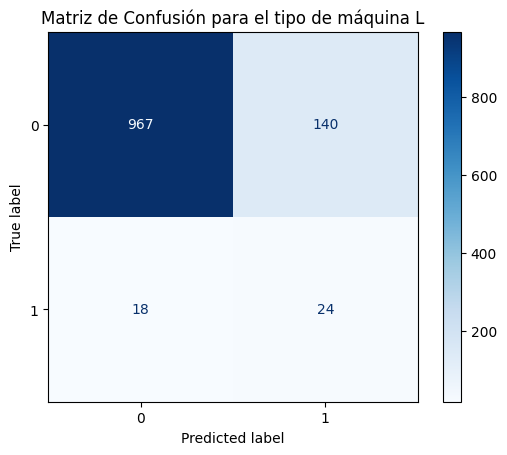



Métricas para el tipo de máquina H:
  Precisión (Accuracy): 0.8608247422680413
  Precisión (Precision): 0.07407407407407407
  Recall: 0.5
  F1-Score: 0.12903225806451613
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


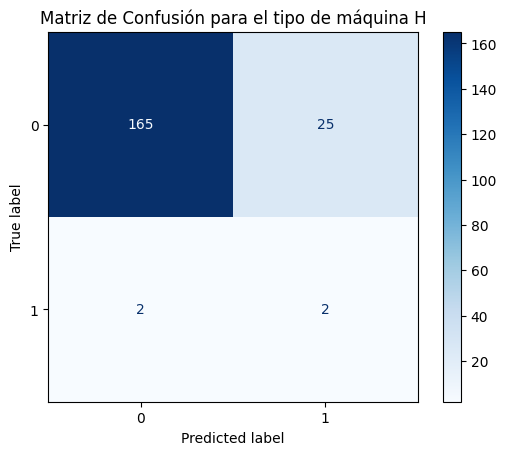

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

# Iterar sobre los modelos entrenados y calcular las métricas para cada uno
for (X_train, X_test, y_train, y_test), type_maquina, knn_classifier in zip(datos_por_type_maquina, type_maquina_unicos, trained_models):
    # Predecir en el conjunto de prueba
    yhat = knn_classifier.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    f1 = f1_score(y_test, yhat)
    jaccard = jaccard_score(y_test, yhat)
    roc_auc = roc_auc_score(y_test, yhat)
    confusion = confusion_matrix(y_test, yhat)
    
    # Imprimir las métricas
    print(f"Métricas para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}:")
    print(f"  Precisión (Accuracy): {accuracy}")
    print(f"  Precisión (Precision): {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Jaccard Score: {jaccard}")
    print(f"  ROC AUC Score: {roc_auc}")

    # Visualizar la matriz de confusión como un gráfico
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')  # Especifica el mapa de color como 'Blues'
    plt.title(f"Matriz de Confusión para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}")
    plt.show()
    print("\n")


Nearest Centroid

In [47]:
from sklearn.neighbors import NearestCentroid


In [48]:
# Lista para almacenar los modelos entrenados de Nearest Centroid
trained_nc_models = []

# Iterar sobre los conjuntos de datos por tipo de máquina
for (X_train, X_test, y_train, y_test), type_maquina in zip(datos_por_type_maquina, type_maquina_unicos):
    # Inicializar el clasificador Nearest Centroid
    nc_classifier = NearestCentroid()
    
    # Entrenar el modelo
    nc_classifier.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    yhat = nc_classifier.predict(X_test)
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, yhat)
    
    # Imprimir la precisión del modelo
    print(f"Precisión del modelo Nearest Centroid para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}: {accuracy}")
    
    # Guardar el modelo entrenado
    trained_nc_models.append(nc_classifier)


Precisión del modelo Nearest Centroid para el tipo de máquina M: 0.7217391304347827
Precisión del modelo Nearest Centroid para el tipo de máquina L: 0.7049608355091384
Precisión del modelo Nearest Centroid para el tipo de máquina H: 0.6082474226804123


Evaluar el rendimiento del Nearest Centroid:

Métricas para el tipo de máquina M:
  Precisión (Accuracy): 0.7217391304347827
  Precisión (Precision): 0.05357142857142857
  Recall: 0.9
  F1-Score: 0.10112359550561797
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


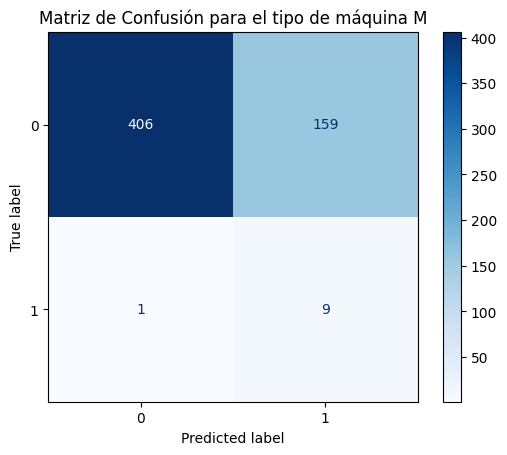



Métricas para el tipo de máquina L:
  Precisión (Accuracy): 0.7049608355091384
  Precisión (Precision): 0.09973045822102426
  Recall: 0.8809523809523809
  F1-Score: 0.1791767554479419
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


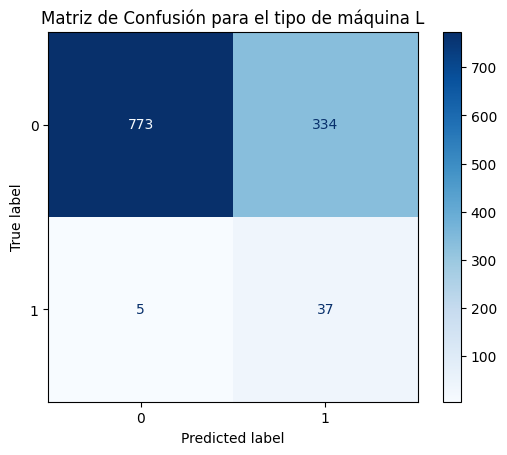



Métricas para el tipo de máquina H:
  Precisión (Accuracy): 0.6082474226804123
  Precisión (Precision): 0.038461538461538464
  Recall: 0.75
  F1-Score: 0.07317073170731707
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


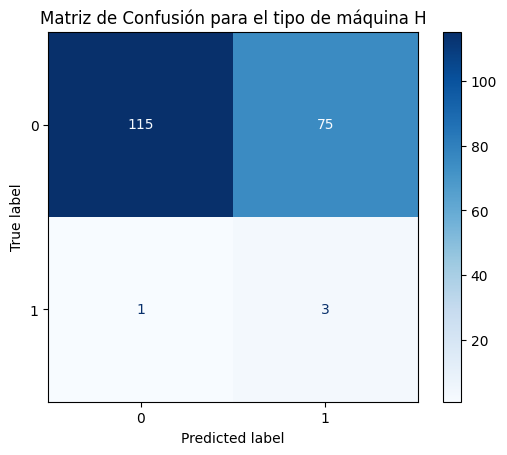

In [49]:
# Iterar sobre los modelos entrenados de Nearest Centroid y calcular las métricas para cada uno
for (X_train, X_test, y_train, y_test), type_maquina, nc_classifier in zip(datos_por_type_maquina, type_maquina_unicos, trained_nc_models):
    # Predecir en el conjunto de prueba
    yhat = nc_classifier.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    f1 = f1_score(y_test, yhat)
    confusion = confusion_matrix(y_test, yhat)
    
    # Imprimir las métricas
    print(f"Métricas para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}:")
    print(f"  Precisión (Accuracy): {accuracy}")
    print(f"  Precisión (Precision): {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Jaccard Score: {jaccard}")
    print(f"  ROC AUC Score: {roc_auc}")

    # Visualizar la matriz de confusión como un gráfico
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')  # Especifica el mapa de color como 'Blues'
    plt.title(f"Matriz de Confusión para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}")
    plt.show()
    print("\n")


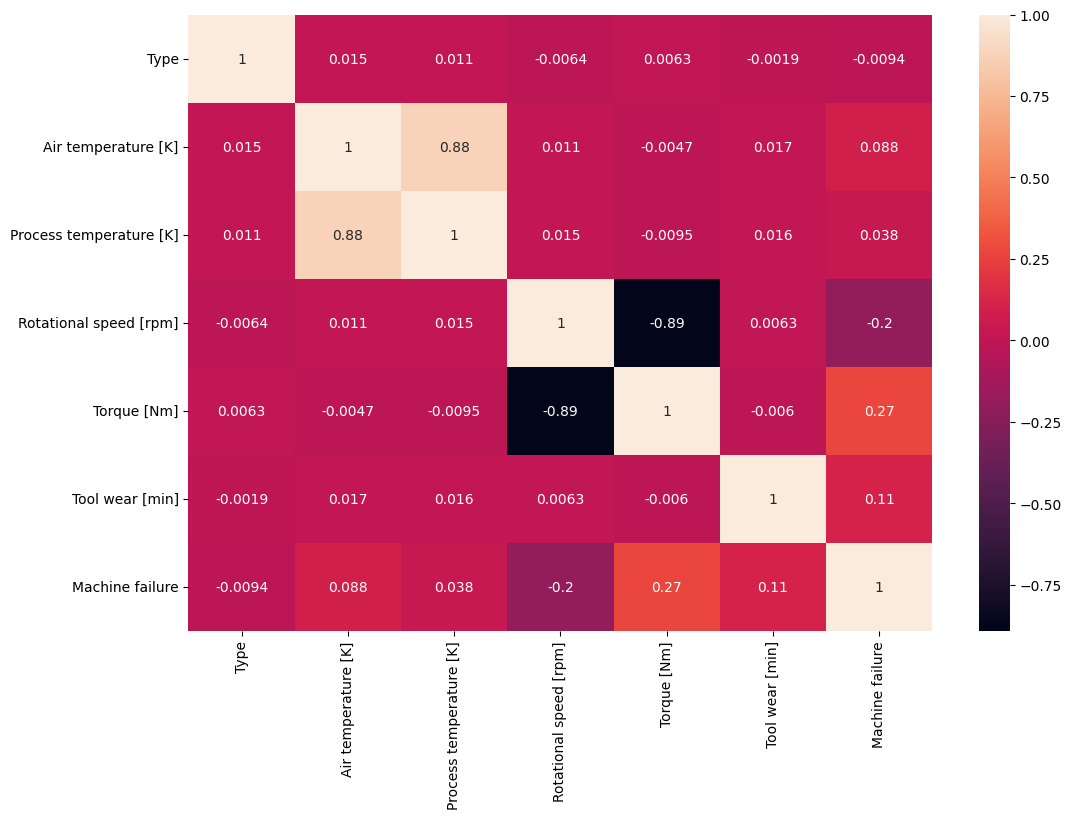

In [50]:
### Correlación

plt.figure(figsize = (12, 8))

sns.heatmap(df_principal_reducido.corr(), annot = True)
plt.show()

In [51]:
# Guardamos en .csv

df_principal_reducido.to_csv("machine failure_preprocesamiento.csv", index = False)

In [52]:
# Conservar la columna "Type" en el DataFrame
model_df = df_principal_reducido.copy()

# Ignorar la columna "Machine failure" en el DataFrame
ignore_cols = ['Machine failure']
model_df.drop(columns=ignore_cols, inplace=True)

model_df

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                       1551         42.8                0  
1                       1408         46.3                3  
2                       1498         49.4                5  
3                       1433         39.5                7  
4                       1408         40.0                9  
...                      ...          ...              ...  
9995                    1604         29.5               14  
9996                    1632         31.8               17  
9997                    1645         33.4               22  
9998                    1408         48.5               25  
9999                    1500         40.2               30  

[9582 rows x 6 columns]

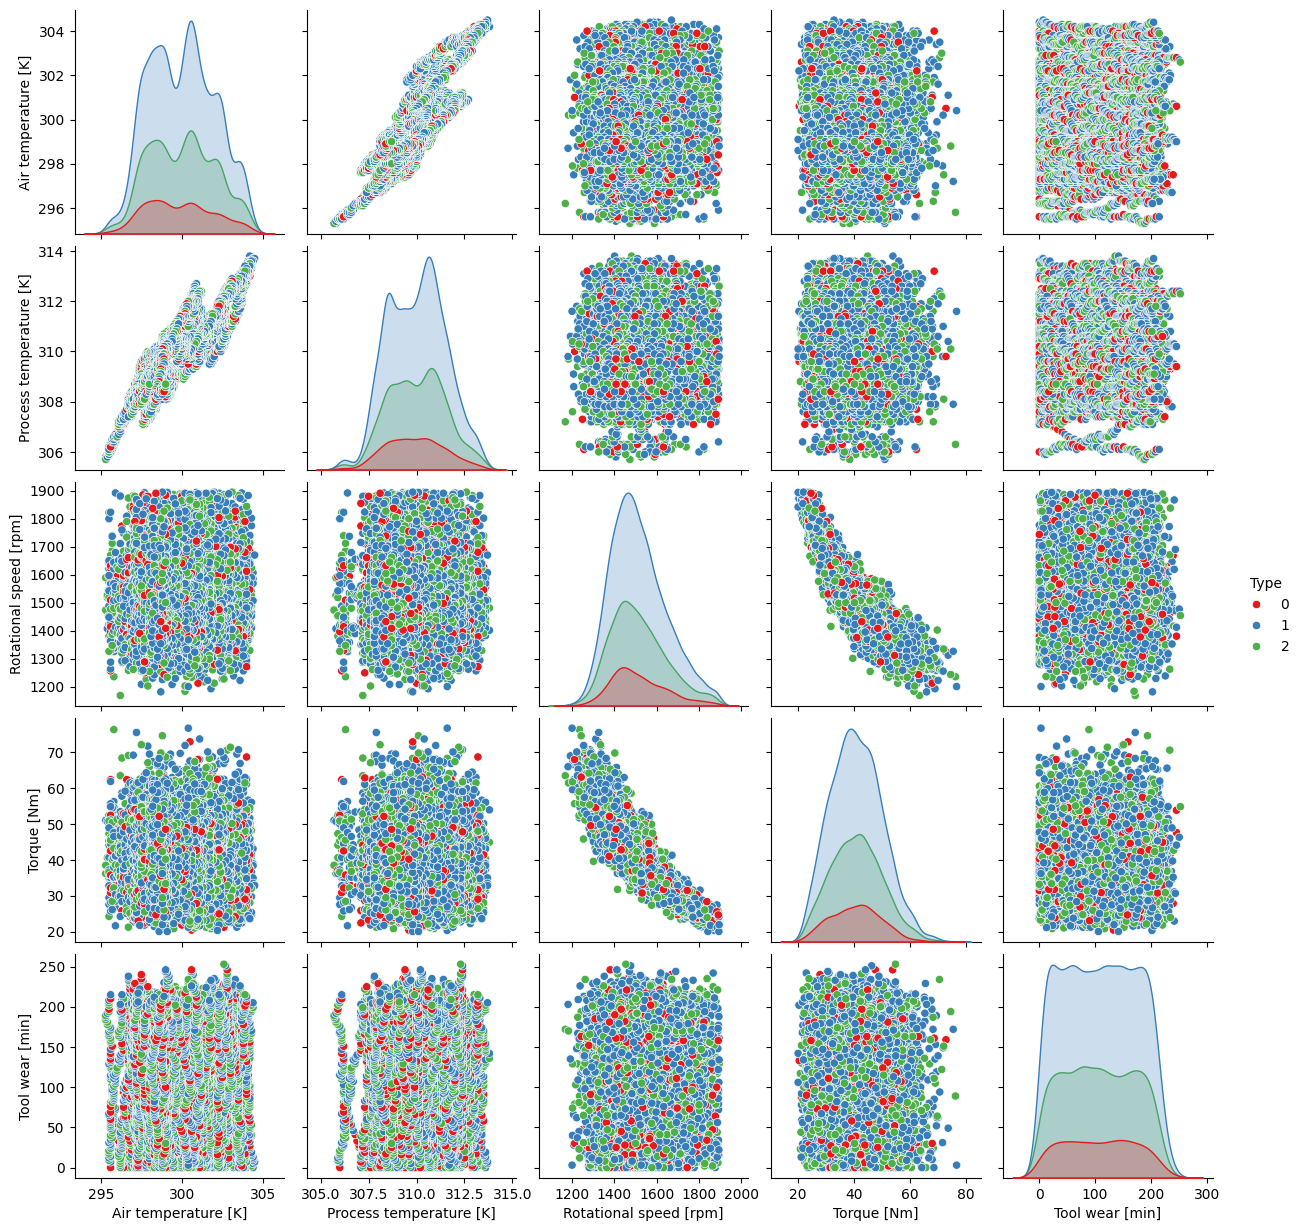

In [53]:
sns.pairplot(model_df, hue='Type', palette='Set1') 
plt.show()